In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

In [ ]:
Оптимизация реальной целевой функции - это та функция, у которой надо найти минимум или максимум
на бизнес-уровне целевая функция выглядит как Доходы - Расходы.
Чем больше значение ее (доходы больше, расходы меньше), тем лучше.

Оптимизация - это максимизация или минимизация функции 
при наличии множественных ограничений (бизнесовые, физические, логические и т д)

например: 
Максимизировать наше предсказание:
Ограничения - наши наблюдения в выборке, 
целевая функция - функция потерь

In [2]:
data = np.array([
    [3, 30000, 2],
    [10, 65000, 0],
    [6, 15000, 1],
    [12, 53000, 0],
    [1, 70000, 0],
    [3, 45000, 1],
    [4, 25000, 0],
    [1, 20000, 2]
])

In [ ]:
1 - стаж
2 - доход
3 - кол-во убытков


а0x0 + a1x1 + a2 = y
x0 - стаж
x1 - доход

Задача хотим предсказать кол-во убытков по стажу и доходу

хотим подбирать а0, а1, а2


In [6]:
# смотрим корреляцию признаков:
сравниваем каждый признак с целевым вектором (это столбец убытки) Называется таргет.

In [3]:
stats.pearsonr(data[:, 1], data[:, 2])[0]

-0.633192455625601

In [4]:
stats.pearsonr(data[:, 0], data[:, 2])[0]

-0.5146749286021822

In [ ]:
видим сильную обратную корреляцию, например чем стаж меньше, тем убытков больше

для двух факторов достаточно 100 наблюдений.
необязательно много статистики

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
цель - минимизировать отклонения нашего предсказания от целевого значения
то есть нам нужно минимальное отклонение предикта от целевого значения.

MAE - mean absolute error - средняя ошибка по модулю
называется функцией потерь, так как наши отклонения - это как раз потери

In [ ]:
а0, а1 подбираем, а2 сейчас приравниваем 2.29 просто для того, 
чтобы нарисовать график. иначе пришлоьс бы рисовать в 4мерном пространстве

In [9]:
a1 = np.arange(-0.15, 0, 0.001)
a2 = np.arange(-3e-5, -1e-5, 1e-6)
a1, a2 = np.meshgrid(a1, a2)

In [10]:
a1

array([[-0.15 , -0.149, -0.148, ..., -0.003, -0.002, -0.001],
       [-0.15 , -0.149, -0.148, ..., -0.003, -0.002, -0.001],
       [-0.15 , -0.149, -0.148, ..., -0.003, -0.002, -0.001],
       ...,
       [-0.15 , -0.149, -0.148, ..., -0.003, -0.002, -0.001],
       [-0.15 , -0.149, -0.148, ..., -0.003, -0.002, -0.001],
       [-0.15 , -0.149, -0.148, ..., -0.003, -0.002, -0.001]])

In [11]:
a2

array([[-3.0e-05, -3.0e-05, -3.0e-05, ..., -3.0e-05, -3.0e-05, -3.0e-05],
       [-2.9e-05, -2.9e-05, -2.9e-05, ..., -2.9e-05, -2.9e-05, -2.9e-05],
       [-2.8e-05, -2.8e-05, -2.8e-05, ..., -2.8e-05, -2.8e-05, -2.8e-05],
       ...,
       [-1.3e-05, -1.3e-05, -1.3e-05, ..., -1.3e-05, -1.3e-05, -1.3e-05],
       [-1.2e-05, -1.2e-05, -1.2e-05, ..., -1.2e-05, -1.2e-05, -1.2e-05],
       [-1.1e-05, -1.1e-05, -1.1e-05, ..., -1.1e-05, -1.1e-05, -1.1e-05]])

In [ ]:
то есть функцией meshgrid получили сетку 

для каждой строчки data считаем loss для каждой пары коэф-тов 

In [17]:
def loss_func(a1, a2, data):
    return np.sum([np.abs(a1 * data[:, 0][d] + a2 * data[:, 1][d] + 2.29 - data[:, 2][d])
                  for d in range(len(data[:, 0]))], axis=0)

In [18]:
loss_func(a1, a2, data)

array([[5.33 , 5.3  , 5.27 , ..., 4.512, 4.538, 4.564],
       [5.197, 5.167, 5.137, ..., 4.645, 4.671, 4.697],
       [5.064, 5.034, 5.004, ..., 4.82 , 4.852, 4.884],
       ...,
       [3.969, 3.957, 3.945, ..., 8.219, 8.253, 8.287],
       [3.976, 3.984, 3.992, ..., 8.482, 8.516, 8.55 ],
       [4.093, 4.101, 4.109, ..., 8.745, 8.779, 8.813]])

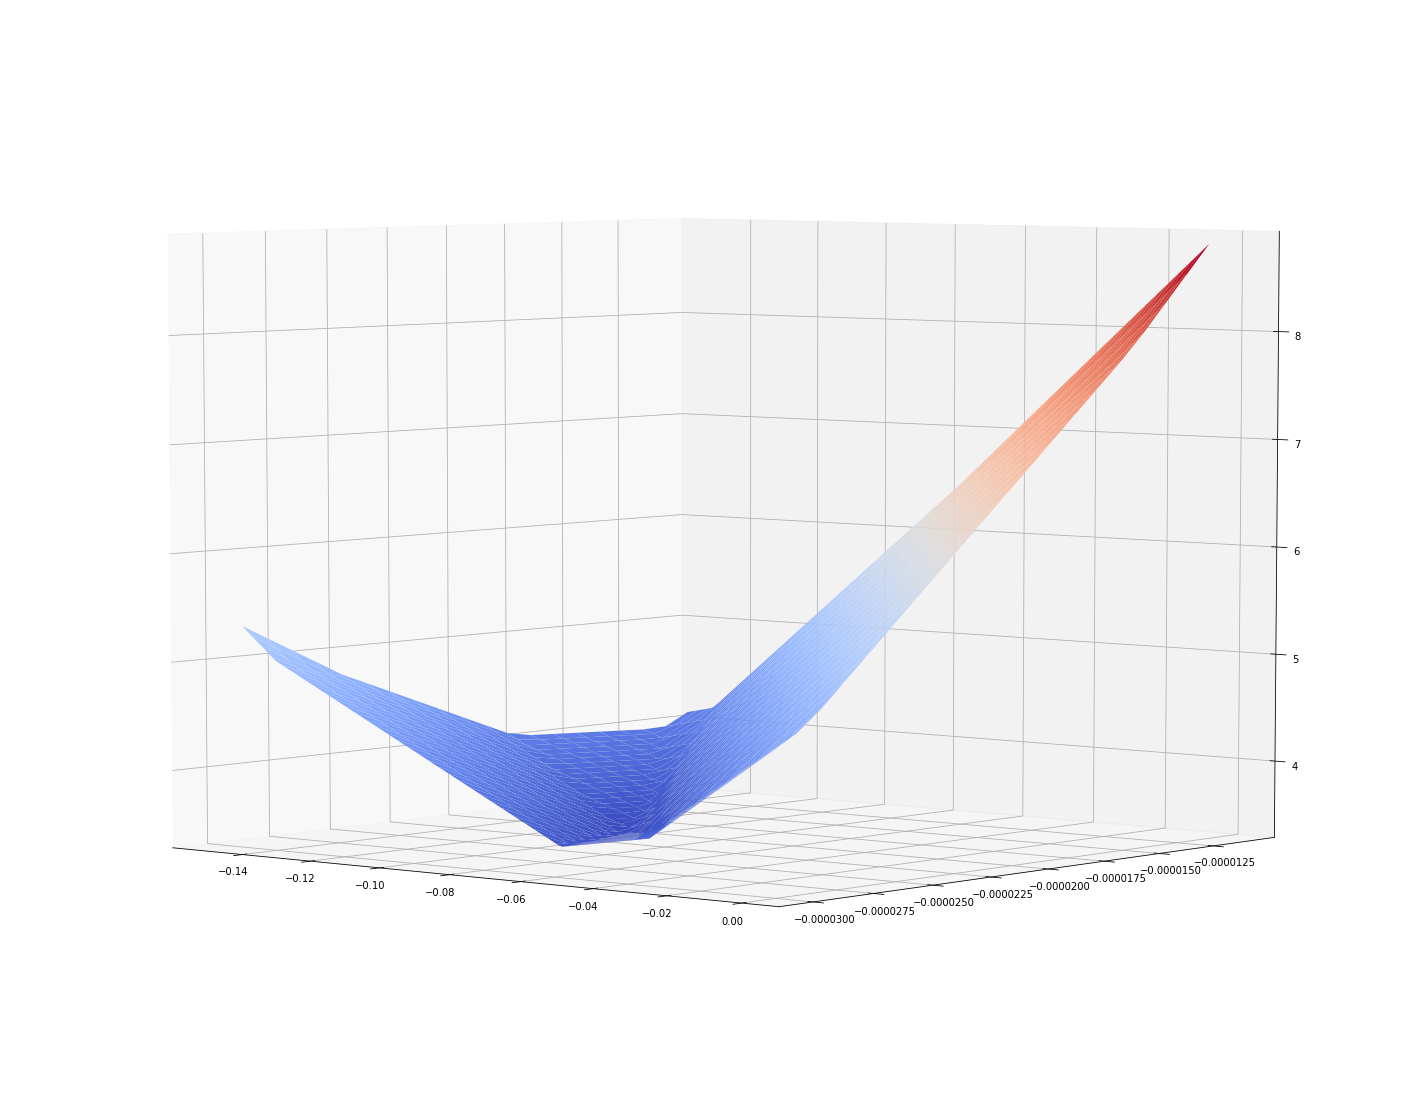

In [35]:
fig = plt.figure(figsize=[25, 20])
ax = fig.gca(projection='3d')
ax.view_init(5, -50)
a1 = np.arange(-0.15, 0, 0.001)
a2 = np.arange(-3e-5, -1e-5, 1e-6)
a1, a2 = np.meshgrid(a1, a2)
z = loss_func(a1, a2, data)

surf = ax.plot_surface(a1, a2, z, cmap=cm.coolwarm)
plt.show()

# по осям отложены коэфф-ты а0 и а1
# задача графика - показать форму функции потерь - есть загибы или нет.
# задача - примерно показать, что значение суммарных потерь меньше 4.

# Какие выводы можно сделать:
# - выводы о применимости алгоритмов
# - выводы о глобальном оптимуме
    
# 1. загиб есть - то есть функция не дифференцируемая, то есть определенные алгоритмы определеить не получится
# 2. она выпуклая, то есть не будет проблем с вычислением глобального минимума. 
# Иначе есть вероятность залипнуть в локальном минимуме или максимуме
# 3. на глаз оцениваем, где будет минимум


# !!! этот график еще не перекладывает на бизнес задачу. Пока график только в помощь аналитику

In [27]:
def loss_func_sq(a1, a2, data):
    return np.sum([(a1 * data[:, 0][d] + a2 * data[:, 1][d] + 2.29 - data[:, 2][d])**2
                  for d in range(len(data[:, 0]))], axis=0)

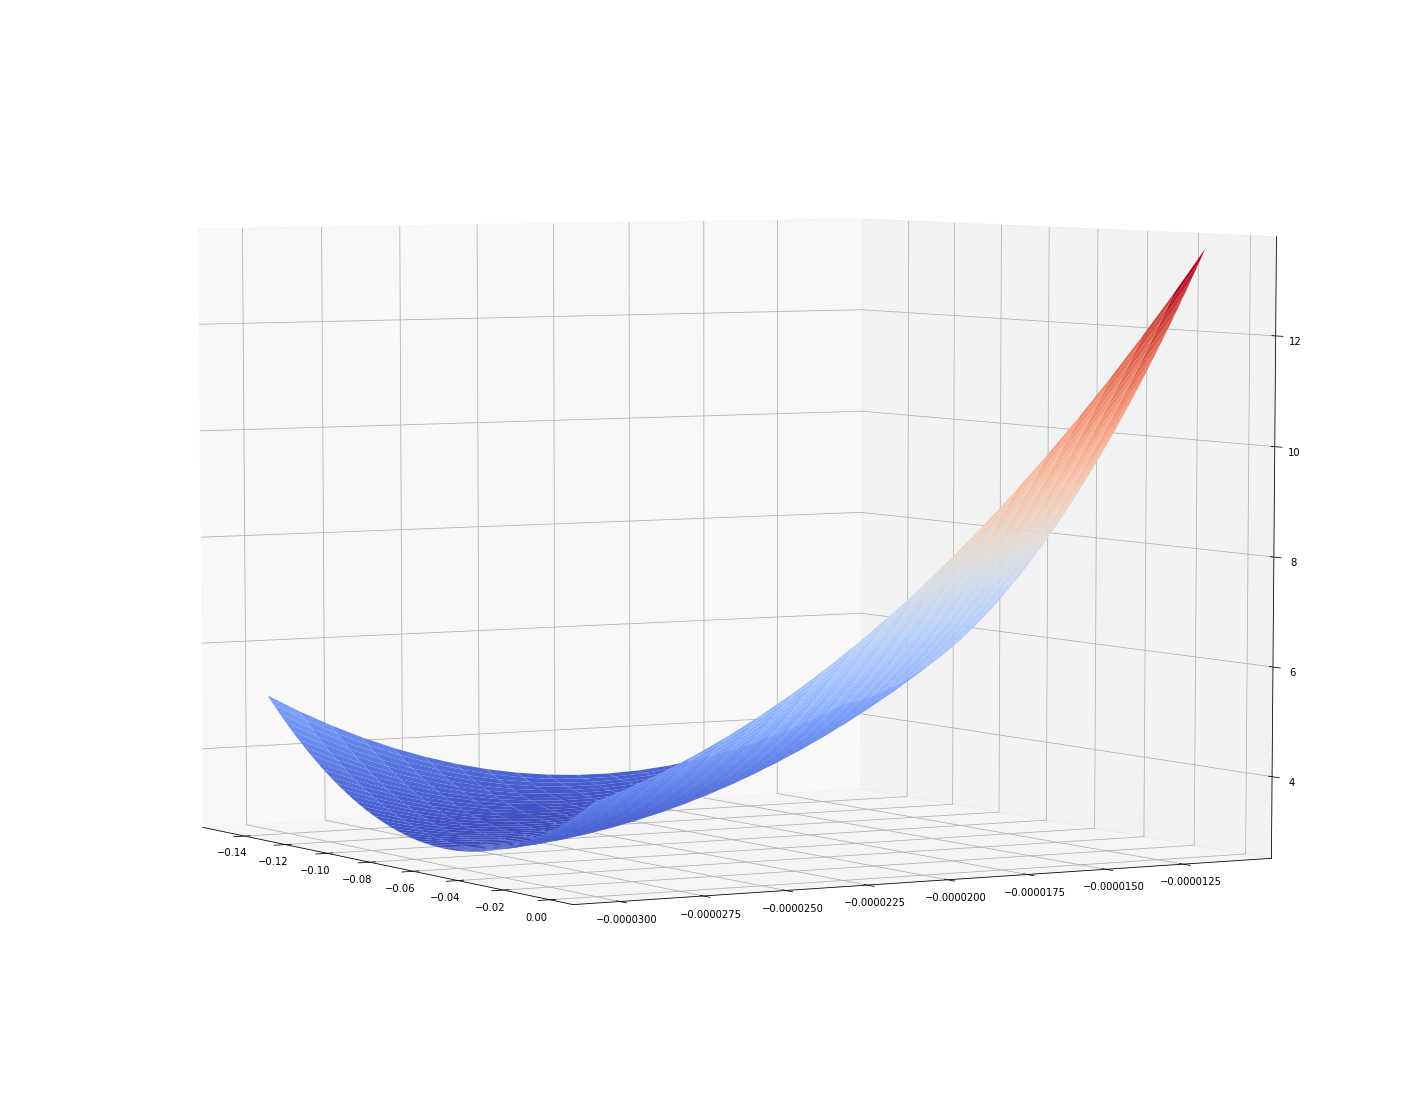

In [30]:
fig = plt.figure(figsize=[25, 20])
ax = fig.gca(projection='3d')
ax.view_init(5, -30)
a1 = np.arange(-0.15, 0, 0.001)
a2 = np.arange(-3e-5, -1e-5, 1e-6)
a1, a2 = np.meshgrid(a1, a2)
z = loss_func_sq(a1, a2, data)

surf = ax.plot_surface(a1, a2, z, cmap=cm.coolwarm)
plt.show()

In [36]:
# Оптимизация коэф-тов

def func(a):
    errors = []
    for row in data:
        errors.append(abs(row[0]*a[0]+row[1]*a[1]+a[2]-row[2]))
    return sum(errors)


def func_exp(a):
    errors = []
    for row in data:
        errors.append(abs(row[0]*a[0]+row[1]*a[1]+a[2]-row[2]))
        print(row[0]*a[0]+row[1]*a[1]+a[2]-row[2])
    return sum(errors)



Градиент функции - 
это вектор, в какую сторону надо двигаться в данной точке, чтобы значение функции росло.

Как правило, методы оптимизации используют градиент

In [ ]:
Методы

BFGS - был до стохастического градиентного спуска (который сейчас модный)
SLSQP - разновидность метода наименьших квадратов


2 типа оптимизационных задач:

1) есть выборка
2) нет выборки, но есть функция типа доходы и расходы, есть ограничения

In [38]:
res = optimize.minimize(func, [0,0,0], method='BFGS')
print (res)

      fun: 6.0
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([1.40e+01, 1.03e+05, 0.00e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 472
      nit: 0
     njev: 92
   status: 2
  success: False
        x: array([0., 0., 0.])


BFGS не сработал, так как не смог найти производную в точке перегиба

In [39]:
res = optimize.minimize(func, [0,0,0], method='SLSQP')
print (res)

     fun: 3.411106787133437
     jac: array([ -18.        , 1374.26532999,   -2.        ])
 message: 'Optimization terminated successfully.'
    nfev: 151
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([-8.15984618e-02, -3.31257473e-05,  2.73480875e+00])


то есть при таких коэф-тах наши предикты будут оптимальны
то есть при таких коэф-тах отклонения предсказанных значений от реальных будут минимальны


In [40]:
func_exp(res.x)

-0.5037590546988009
-0.2343494445613694
0.7483317700323617
-3.7400048157998356e-05
0.33440797509387465
-0.0006452648920756143
1.5802712202115865
-0.009304657595210042


3.411106787133437

In [41]:
data[: , 2]

array([2, 0, 1, 0, 0, 1, 0, 2])

In [ ]:
то есть в предпоследнем случае мы предсказали 1.58 убытков, а на самом деле 0. 
для этого клиента мы бы ошиблись, в остальном все правильно

In [43]:
# предскажем теперь для такого клиента
[8, 50000]

[8, 50000]

In [45]:
np.sum(np.array([-8.15984618e-02, -3.31257473e-05,  2.73480875e+00]) * np.array([8 , 50000, 1]))

0.42573369060000044